In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import csv
sns.set(rc={'figure.figsize':(8.7,5.27)})

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(2)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [5]:
train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [6]:
test.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
count,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,...,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000
mean,17933.500000,3.872850,207764.846930,293.130123,67.388334,1.596805,30.762867,769.926504,2.729409,462.436681,...,0.001952,0.002007,0.002705,0.002370,0.003374,0.003680,0.004322,0.005548,0.006162,0.007333
std,10353.766714,0.460537,114561.745828,89.298799,17.246741,0.490546,9.726146,41.779664,8.029155,381.314899,...,0.056838,0.059238,0.071770,0.066958,0.086539,0.092898,0.099676,0.121322,0.141455,0.160602
min,1.000000,2.375000,15000.000000,60.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8967.250000,3.500000,119000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17933.500000,3.875000,182000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,742.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26899.750000,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35866.000000,6.625000,802000.000000,360.000000,97.000000,2.000000,55.000000,839.000000,35.000000,832.000000,...,5.000000,5.000000,6.000000,6.000000,7.000000,5.000000,6.000000,7.000000,8.000000,9.000000


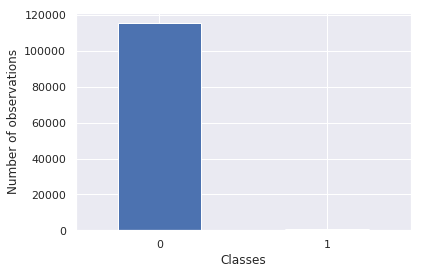

In [7]:
train.m13.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("Classes")
plt.ylabel("Number of observations")
plt.show()

In [8]:
train.drop(['loan_id','source','financial_institution','origination_date','first_payment_date','insurance_type','loan_purpose'],axis=1,inplace=True)
test.drop(['loan_id','source','financial_institution','origination_date','first_payment_date','insurance_type','loan_purpose'],axis=1,inplace=True)

In [9]:
pos= len(train.columns)-1

In [10]:
train.insert(pos,'deliquent_sum',train.iloc[:,pos-12:pos].sum(axis=1).astype('int'))

test.insert(pos,'deliquent_sum',test.iloc[:,pos-12:pos].sum(axis=1).astype('int'))

#### Principal Balance

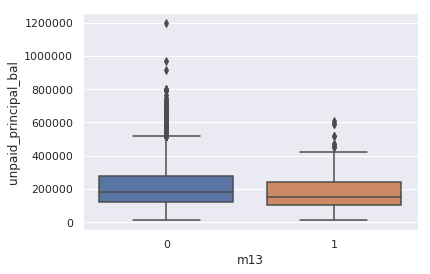

In [11]:
sns.boxplot(x='m13',y='unpaid_principal_bal',data=train)
plt.show()

In [12]:
drop1=train[train['unpaid_principal_bal']>610000].index

In [13]:
train.drop(drop1,inplace=True)

#### Interest Rate

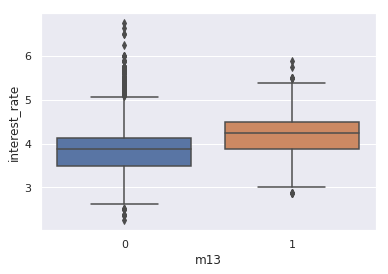

In [14]:
sns.boxplot(x='m13',y='interest_rate',data=train)
plt.show()

In [15]:
drop2=train[(train['interest_rate']>6) | (train['interest_rate']<2.7)].index

In [16]:
train.drop(drop2,inplace=True)

#### Loan to value

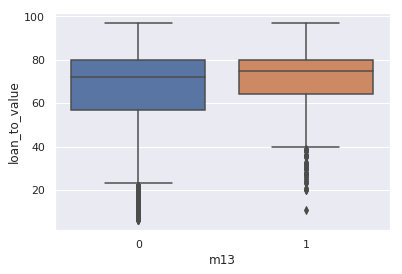

In [17]:
sns.boxplot(x='m13',y='loan_to_value',data=train)
plt.show()

In [18]:
drop3=train[train['loan_to_value']<19].index

In [19]:
train.drop(drop3,inplace=True)

#### Debt to income ratio

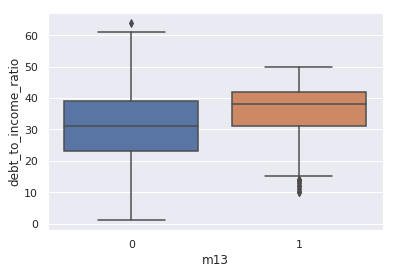

In [20]:
sns.boxplot(x='m13',y='debt_to_income_ratio',data=train)
plt.show()

In [21]:
drop4 = train[train['debt_to_income_ratio']>60].index

In [22]:
train.drop(drop4,inplace=True)

#### Borrower Credit Score

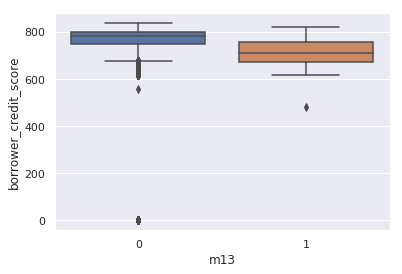

In [23]:
sns.boxplot(x='m13',y='borrower_credit_score',data=train)
plt.show()

In [24]:
drop5 = train[train['borrower_credit_score']<590].index

In [25]:
train.drop(drop5,inplace=True)

#### Deliquent Sum

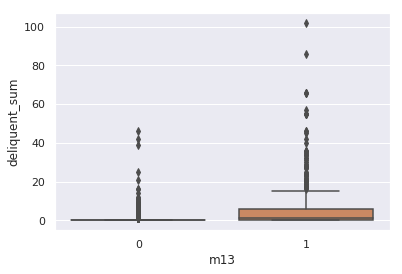

In [26]:
sns.boxplot(x='m13',y='deliquent_sum',data=train)
plt.show()

In [27]:
drop6 = train[train['deliquent_sum']>53].index

In [28]:
train.drop(drop6,inplace=True)

In [29]:
train.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10'],axis=1,inplace=True)
test.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10'],axis=1,inplace=True)

In [30]:
train.groupby(['number_of_borrowers','m13']).m13.count()

number_of_borrowers  m13
1.0                  0      46373
                     1        417
2.0                  0      67777
                     1        207
Name: m13, dtype: int64

In [31]:
train.groupby(['co-borrower_credit_score','m13']).m13.count()

co-borrower_credit_score  m13
0.0                       0      46414
                          1        417
620.0                     0          8
621.0                     0          9
622.0                     0          9
623.0                     0         10
624.0                     0         10
625.0                     0          9
                          1          1
626.0                     0          4
627.0                     0          5
628.0                     0          6
                          1          1
629.0                     0          6
630.0                     0         13
631.0                     0          5
632.0                     0         11
633.0                     0         12
                          1          3
634.0                     0          6
635.0                     0          7
                          1          1
636.0                     0         12
637.0                     0         13
                          1       

In [32]:
train.drop('co-borrower_credit_score',axis=1,inplace=True)
test.drop('co-borrower_credit_score',axis=1,inplace=True)

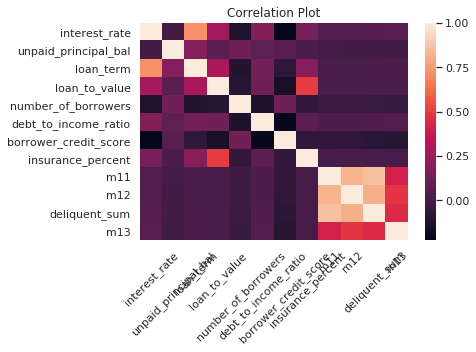

In [33]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.title("Correlation Plot")
plt.xticks(rotation=45)
plt.show()

In [1]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
scalar = MinMaxScaler()

In [36]:
train.iloc[:,:11]

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,m11,m12,deliquent_sum
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0,0,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,1,0,1
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0,0,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,1,1,4
5,4.375,150000,360,80,1.0,46.0,675.0,0.0,0,0,1
6,4.000,59000,360,95,1.0,44.0,723.0,30.0,0,0,0
7,4.500,319000,300,62,1.0,45.0,652.0,0.0,0,0,1
8,4.000,520000,360,76,1.0,35.0,808.0,0.0,0,1,6
9,4.000,214000,360,95,2.0,41.0,702.0,30.0,2,2,9
10,4.125,74000,360,90,1.0,42.0,738.0,25.0,0,1,1


In [37]:
scaled_data=scalar.fit_transform(train.iloc[:,:11])

In [38]:
scaled_data

array([[0.46564885, 0.33889816, 1.        , ..., 0.        , 0.        ,
        0.02173913],
       [0.65648855, 0.22203673, 1.        , ..., 0.125     , 0.        ,
        0.02173913],
       [0.16030534, 0.59265442, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.35114504, 0.25876461, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46564885, 0.26377295, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19847328, 0.40233723, 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [39]:
scaled_data.shape

(114774, 11)

In [40]:
y=np.asarray(train.m13)
X=scaled_data

In [41]:
total_data = pd.concat([train.iloc[:,:11],test],ignore_index=True)

In [42]:
total_data.iloc[:114774,:]

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,m11,m12,deliquent_sum
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0,0,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,1,0,1
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0,0,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,1,1,4
4,4.375,150000,360,80,1.0,46.0,675.0,0.0,0,0,1
5,4.000,59000,360,95,1.0,44.0,723.0,30.0,0,0,0
6,4.500,319000,300,62,1.0,45.0,652.0,0.0,0,0,1
7,4.000,520000,360,76,1.0,35.0,808.0,0.0,0,1,6
8,4.000,214000,360,95,2.0,41.0,702.0,30.0,2,2,9
9,4.125,74000,360,90,1.0,42.0,738.0,25.0,0,1,1


In [43]:
total_scaled_data=scalar.fit_transform(total_data)

In [44]:
trainX = total_scaled_data[:114774]

In [45]:
testX = total_scaled_data[114774:]

In [46]:
#train_data1 = np.insert(X,11,values=y,axis=1)

In [47]:
#np.savetxt('train_data1.npy',train_data1)